In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [3]:
cc = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/credit_fraud.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cc.shape

(10000, 31)

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
Time      10000 non-null int64
V1        10000 non-null float64
V2        10000 non-null float64
V3        10000 non-null float64
V4        10000 non-null float64
V5        10000 non-null float64
V6        10000 non-null float64
V7        10000 non-null float64
V8        10000 non-null float64
V9        10000 non-null float64
V10       10000 non-null float64
V11       10000 non-null float64
V12       10000 non-null float64
V13       10000 non-null float64
V14       10000 non-null float64
V15       10000 non-null float64
V16       10000 non-null float64
V17       10000 non-null float64
V18       10000 non-null float64
V19       10000 non-null float64
V20       10000 non-null float64
V21       10000 non-null float64
V22       10000 non-null float64
V23       10000 non-null float64
V24       10000 non-null float64
V25       10000 non-null float64
V26       10000 non-null float64
V27

Class as pie chart:


Text(0, 0.5, '')

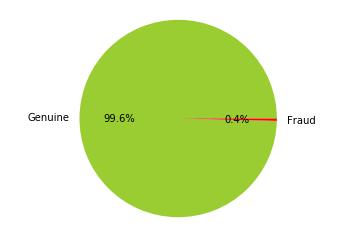

In [7]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(cc.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [8]:
cc = cc.drop(['Time'],axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
cc['scaled_Amount'] = StandardScaler().fit_transform(cc['Amount'].values.reshape(-1,1))
cc = cc.drop(['Amount'],axis=1)

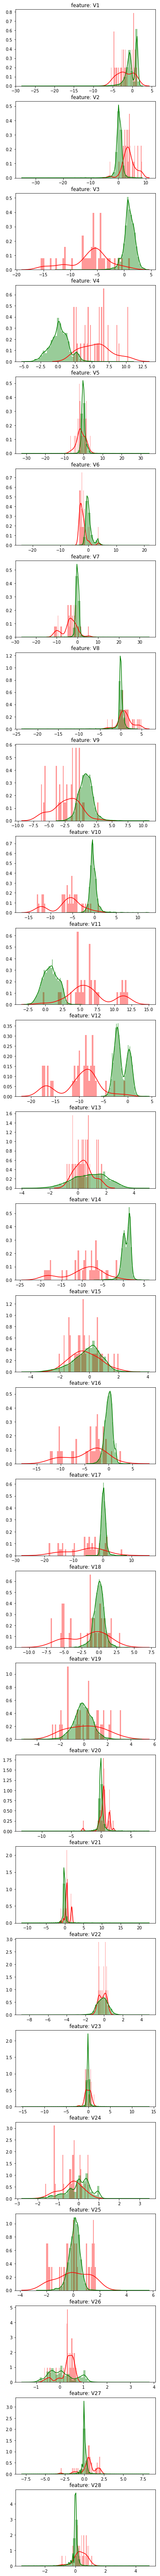

In [10]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cc[cc.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class == 1], bins=50, color='r')
    sns.distplot(cc[col][cc.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [18]:
def split_data(cc, drop_list):
    cc = cc.drop(drop_list,axis=1)
    print(cc.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = cc['Class'].values #target
    X = cc.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test


In [19]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [20]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [21]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_Amount'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [22]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7914   56]
 [   1   29]]


In [23]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1964   28]
 [   1    7]]
recall score:  0.875
precision score:  0.2
f1 score:  0.32558139534883723
accuracy score:  0.9855
ROC AUC: 0.9871360441767069


In [24]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [25]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7930   40]
 [   1   29]]


In [26]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1971   21]
 [   1    7]]
recall score:  0.875
precision score:  0.25
f1 score:  0.3888888888888889
accuracy score:  0.989
ROC AUC: 0.9079756526104417
